In [22]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
PATH = "Movies.csv"
dataset = pd.read_csv(PATH)
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset = dataset.dropna(subset=['Rating'])

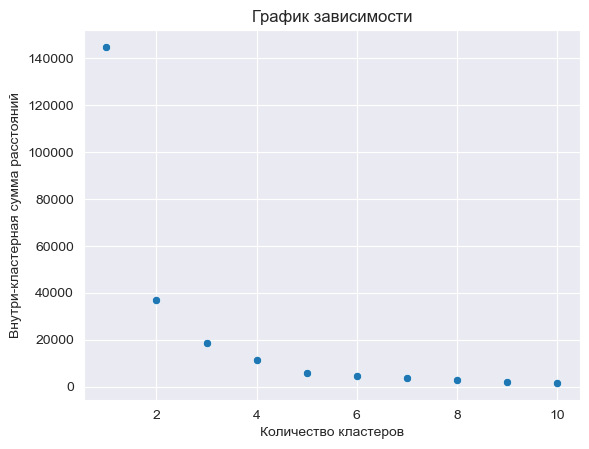

In [24]:
inertia = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    columns_to_drop = ["Director", "Movie"]
    k_means.fit(dataset.drop(columns_to_drop, axis=1))
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

plt.savefig("Рис 7.jpg")

In [25]:
CLUSTERS = 4

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(dataset.drop(columns_to_drop, axis=1))

clusters = pd.DataFrame(
    columns=dataset.columns.drop(columns_to_drop),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,Released_year,Rating,Amount
0,2008.614583,8.301042,96
1,1959.354167,8.337500,48
2,1987.784810,8.344304,79
3,1934.526316,8.305263,19


In [16]:
dataset['Views'] = dataset['Rating'] * 1000 + np.random.randint(100, 1000, size=len(dataset))
print(dataset.head())

                      Movie  Released_year  Rating              Director  \
0  The Shawshank Redemption           1994     9.3        Frank Darabont   
1             The Godfather           1972     9.2  Francis Ford Coppola   
2    The Godfather: Part II           1974     9.0  Francis Ford Coppola   
3           The Dark Knight           2008     9.0     Christopher Nolan   
4              12 Angry Men           1957     8.9          Sidney Lumet   

     Views  
0  10027.0  
1   9652.0  
2   9548.0  
3   9843.0  
4   9888.0  


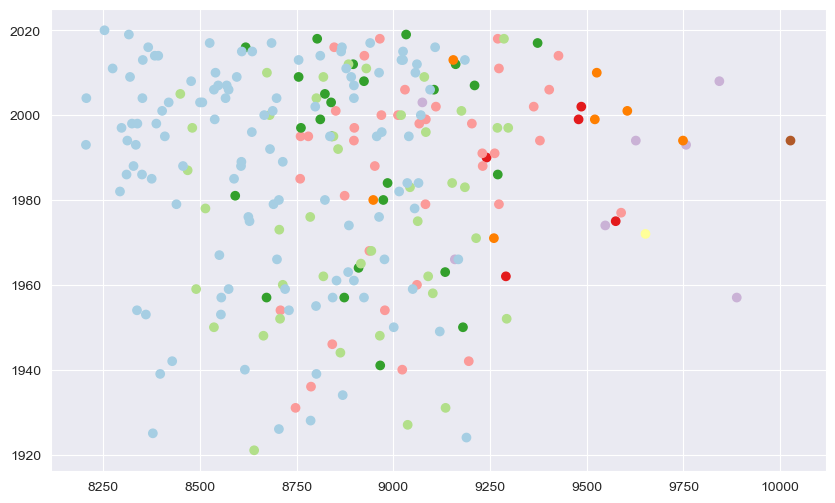

In [17]:
plt.figure(figsize = (10,6))
plt.scatter(dataset["Views"], dataset["Released_year"], c = dataset["Rating"], cmap="Paired" )